In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 18})

In [9]:
def linear_lstsq(X, F):
    A_t, _, _, _ = np.linalg.lstsq(X, F, rcond=-1)
    return A_t

def rbf(X, F, L, centers, eps):
    Phy_l = Phy_l_(X, L, centers, eps)
    C_t = linear_lstsq(Phy_l, F)
    return C_t, Phy_l

def Phy_l_(X, L, centers, eps):
    Phy_l_mat = np.zeros((X.shape[0], L))
    for i, data_point in enumerate(X):
        for j, center_row in enumerate(centers):
            Phy_l_mat[i, j] = phy_l_(X[center_row, :], data_point, eps)
    return Phy_l_mat

def choose_centers(X, L):
    centers = np.arange(X.shape[0])
    np.random.shuffle(centers)
    return centers[:L]

def phy_l_(x_l, x, eps):
    return np.exp(-np.square(np.linalg.norm(x_l - x)) / eps ** 2)
    

# Part 1

In [3]:
# read data
linear = np.loadtxt('../data/linear_function_data.txt', delimiter=' ')
X = linear[:, 0].reshape(-1, 1)
F = linear[:, 1]

Text(0.5, 1.0, 'Linear least squares solution')

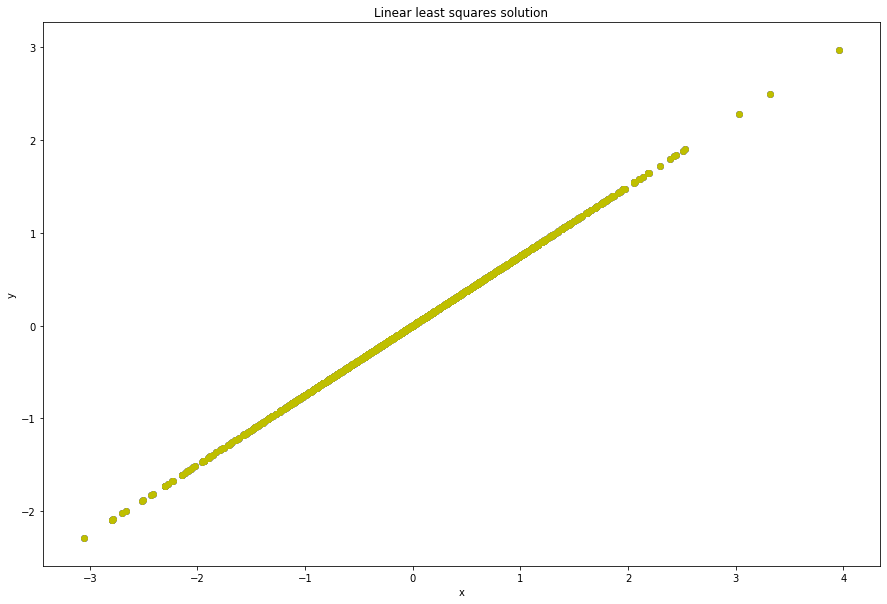

In [4]:
# get linear approximation
A_t = linear_lstsq(X, F)
# plot least squares solution
plt.figure(figsize=(15, 10))
plt.scatter(X, F, c='b')
plt.scatter(X, np.dot(X, A_t), c='y')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear least squares solution")

# Part 2

In [5]:
# read data
non_linear = np.loadtxt('../data/nonlinear_function_data.txt', delimiter=' ')
X = non_linear[:, 0].reshape(-1, 1)
F = non_linear[:, 1]

Text(0.5, 1.0, 'Linear least squares solution')

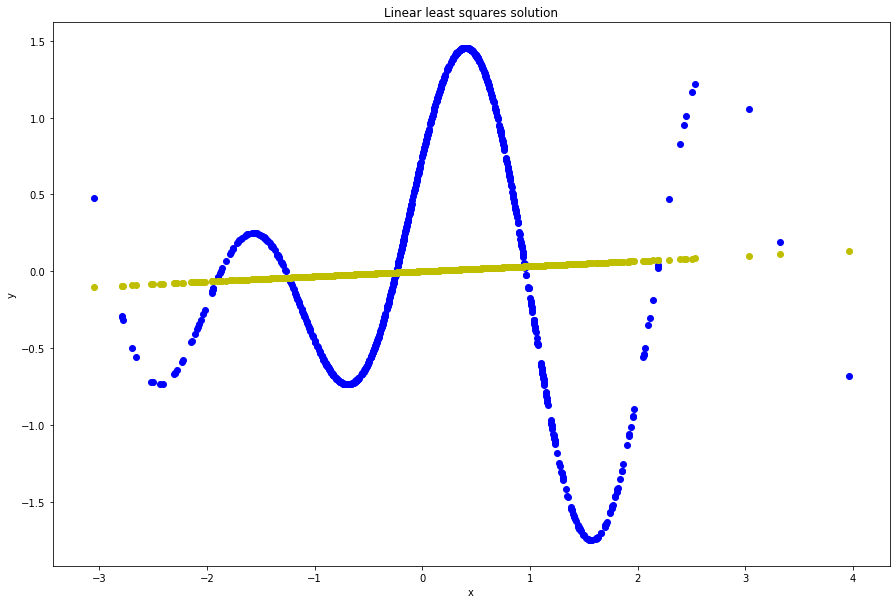

In [6]:
# get linear approximation
A_t = linear_lstsq(X, F)
# plot least squares solution
plt.figure(figsize=(15, 10))
plt.scatter(X, F, c='b')
plt.scatter(X, np.dot(X, A_t), c='y')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear least squares solution")

# Part 3

In [28]:
L = 10
centers = choose_centers(X, L)
eps = 0.5 * max(map(max, X))
C_t, Phy_l = rbf(X, F, L, centers, eps)

Text(0.5, 1.0, 'Radial basis solution')

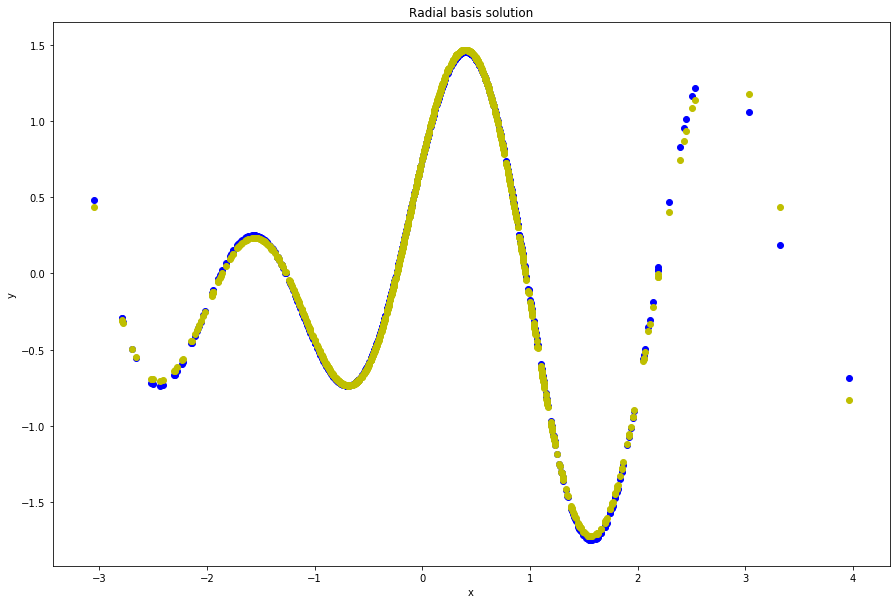

In [29]:
# plot rbf solution
plt.figure(figsize=(15, 10))
plt.scatter(X, F, c='b')
plt.scatter(X, np.dot(Phy_l, C_t), c='y')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Radial basis solution")